In [2]:
#importing packages i'd need
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#importing dataset into a dataframe
df = pd.read_csv("audible.csv")
df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


In [3]:
#checking for null values
df.isna().sum()

name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64

In [4]:
#checking for duplicates
df.duplicated().sum()

0

In [4]:
#removing unnecessary text in the author and narrator columns
df['author'] = df['author'].str.replace('Writtenby:', "")
df['narrator'] = df['narrator'].str.replace('Narratedby:', "")
df

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [5]:
#creating a function to split names in the author and narrators column
def split_names(data, column_name):
    pattern = re.compile(r'(?<=[a-z])(?=[A-Z])')
    data[column_name] = data[column_name].apply(lambda x: ' '.join(pattern.split(x, 1)))
    return data
df = split_names(df, 'author')
df

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Rick Riordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Jeff Kinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Rick Riordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Stephen O'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Mark Twain,FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Laurence Sterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [6]:
df = split_names(df, 'narrator')
df

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Rick Riordan,Robbie Daymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Jeff Kinney,Dan Russell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,Chris Stewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Stephen O'Shea,Robert Fass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Mark Twain,Flo Gibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Laurence Sterne,Anton Lesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [7]:
#workiing on time column to convert to minutes
df['time'] = df['time'].astype(str)
hours = df['time'].str.extract(r'(\d+)\s*hrs').astype(float)
minutes = df['time'].str.extract(r'(\d+)\s*mins').astype(float)
hours_in_min = hours * 60
total_min = hours_in_min.fillna(0) + minutes.fillna(0)
df['time'] = total_min
df

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,140.0,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Rick Riordan,Robbie Daymond,788.0,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Jeff Kinney,Dan Russell,123.0,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,676.0,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,600.0,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,Chris Stewart,454.0,09-03-17,English,Not rated yet,596.00
87485,The Alps,Stephen O'Shea,Robert Fass,607.0,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Mark Twain,Flo Gibson,1144.0,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Laurence Sterne,Anton Lesser,248.0,23-02-11,English,Not rated yet,680.00


In [8]:
#copying stars column to create ratings column inorder to separate stars and ratings 
df['ratings'] = df['stars']
df

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,140.0,04-08-08,English,5 out of 5 stars34 ratings,468.00,5 out of 5 stars34 ratings
1,The Burning Maze,Rick Riordan,Robbie Daymond,788.0,01-05-18,English,4.5 out of 5 stars41 ratings,820.00,4.5 out of 5 stars41 ratings
2,The Deep End,Jeff Kinney,Dan Russell,123.0,06-11-20,English,4.5 out of 5 stars38 ratings,410.00,4.5 out of 5 stars38 ratings
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,676.0,05-10-21,English,4.5 out of 5 stars12 ratings,615.00,4.5 out of 5 stars12 ratings
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,600.0,13-01-10,English,4.5 out of 5 stars181 ratings,820.00,4.5 out of 5 stars181 ratings
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,Chris Stewart,454.0,09-03-17,English,Not rated yet,596.00,Not rated yet
87485,The Alps,Stephen O'Shea,Robert Fass,607.0,21-02-17,English,Not rated yet,820.00,Not rated yet
87486,The Innocents Abroad,Mark Twain,Flo Gibson,1144.0,30-12-16,English,Not rated yet,938.00,Not rated yet
87487,A Sentimental Journey,Laurence Sterne,Anton Lesser,248.0,23-02-11,English,Not rated yet,680.00,Not rated yet


In [9]:
#cleaning the stars column
df['stars'] = df['stars'].str.extract(r'(\d+\.\d+|\d+)')
df['stars']

0          5
1        4.5
2        4.5
3        4.5
4        4.5
        ... 
87484    NaN
87485    NaN
87486    NaN
87487    NaN
87488    NaN
Name: stars, Length: 87489, dtype: object

In [10]:
df['stars'].fillna(value=0.0, inplace=True)
df

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,140.0,04-08-08,English,5,468.00,5 out of 5 stars34 ratings
1,The Burning Maze,Rick Riordan,Robbie Daymond,788.0,01-05-18,English,4.5,820.00,4.5 out of 5 stars41 ratings
2,The Deep End,Jeff Kinney,Dan Russell,123.0,06-11-20,English,4.5,410.00,4.5 out of 5 stars38 ratings
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,676.0,05-10-21,English,4.5,615.00,4.5 out of 5 stars12 ratings
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,600.0,13-01-10,English,4.5,820.00,4.5 out of 5 stars181 ratings
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,Chris Stewart,454.0,09-03-17,English,0.0,596.00,Not rated yet
87485,The Alps,Stephen O'Shea,Robert Fass,607.0,21-02-17,English,0.0,820.00,Not rated yet
87486,The Innocents Abroad,Mark Twain,Flo Gibson,1144.0,30-12-16,English,0.0,938.00,Not rated yet
87487,A Sentimental Journey,Laurence Sterne,Anton Lesser,248.0,23-02-11,English,0.0,680.00,Not rated yet


In [11]:
#working on the ratings column
df['ratings'] = df['ratings'].str.extract(r'(\d+) ratings')
df['ratings']

0         34
1         41
2         38
3         12
4        181
        ... 
87484    NaN
87485    NaN
87486    NaN
87487    NaN
87488    NaN
Name: ratings, Length: 87489, dtype: object

In [12]:
df['ratings'].fillna(value=0.0, inplace=True)
df

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,140.0,04-08-08,English,5,468.00,34
1,The Burning Maze,Rick Riordan,Robbie Daymond,788.0,01-05-18,English,4.5,820.00,41
2,The Deep End,Jeff Kinney,Dan Russell,123.0,06-11-20,English,4.5,410.00,38
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,676.0,05-10-21,English,4.5,615.00,12
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,600.0,13-01-10,English,4.5,820.00,181
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,Chris Stewart,454.0,09-03-17,English,0.0,596.00,0.0
87485,The Alps,Stephen O'Shea,Robert Fass,607.0,21-02-17,English,0.0,820.00,0.0
87486,The Innocents Abroad,Mark Twain,Flo Gibson,1144.0,30-12-16,English,0.0,938.00,0.0
87487,A Sentimental Journey,Laurence Sterne,Anton Lesser,248.0,23-02-11,English,0.0,680.00,0.0


C:\Users\CONTINUUM\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37428 (\N{CJK UNIFIED IDEOGRAPH-9234}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CONTINUUM\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CONTINUUM\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CONTINUUM\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CONTINUUM\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21513 (\N{CJK UNIFIED IDEOGRAPH-5409}) missing from current font.
  fig.canvas

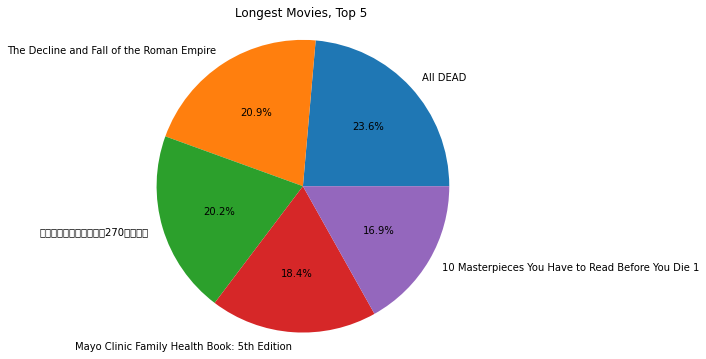

In [13]:
#Visualization to know which movies are longest
movies_time = df.groupby('name')['time'].mean().sort_values(ascending=False)

#selecting the five longest movies
top_movies = movies_time.head(5).index

#plot
plt.figure(figsize=(10, 6))
plt.pie(movies_time[top_movies], labels=top_movies, autopct='%1.1f%%')
plt.title('Longest Movies, Top 5')
plt.axis('equal') #to obtain perfect circle
plt.show()

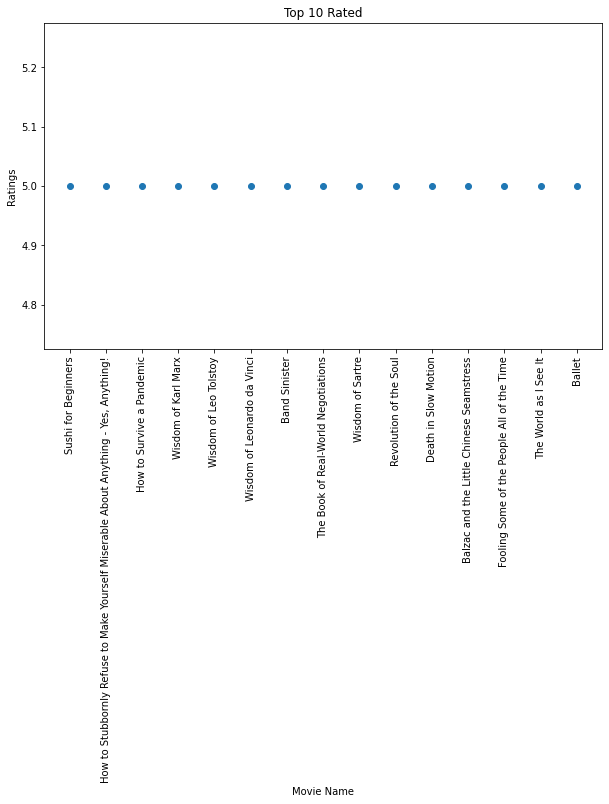

In [20]:
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

movies_ratings = df.groupby('name')['stars'].mean().sort_values(ascending=False)
top_rated_movies = movies_ratings.head(15)

plt.figure(figsize=(10, 6))
plt.scatter(top_rated_movies.index, top_rated_movies.values)
plt.title('Top 10 Rated')
plt.xlabel('Movie Name')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.show()

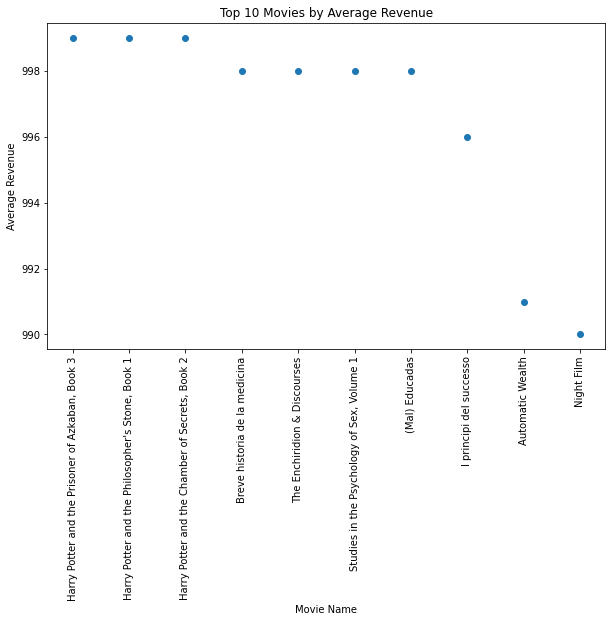

In [15]:
#We convert price column into numeric values to enable visualizing the most expensive movies
df['price'] = pd.to_numeric(df['price'], errors='coerce')

movies_price = df.groupby('name')['price'].mean().sort_values(ascending=False)
top_movies = movies_price.head(10)

plt.figure(figsize=(10, 6))
plt.scatter(top_movies.index, top_movies.values)
plt.title('Top 10 Movies by Average Revenue')
plt.xlabel('Movie Name')
plt.ylabel('Average Revenue')
plt.xticks(rotation=90)
plt.show()

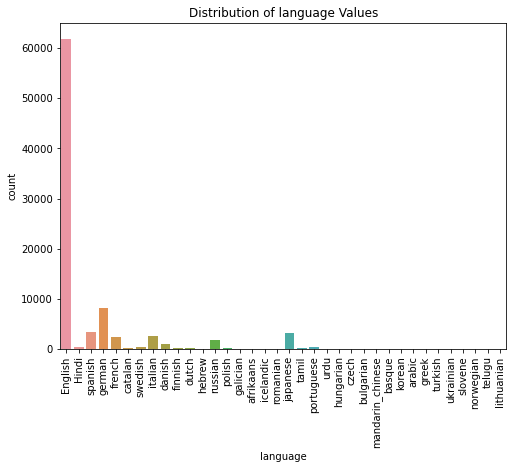

In [14]:
#histogram plot to understand language distribution of the movies
plt.figure(figsize=(8,6))
sns.countplot(x=df['language'])
plt.title('Distribution of language Values')
plt.xticks(rotation=90)
plt.show()